In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout ,Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline

## Preprocessing the data

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test : ",x_test.shape)
print("y_test : ", y_test.shape)

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test :  (10000, 28, 28)
y_test :  (10000,)


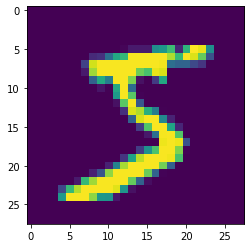

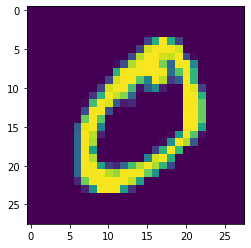

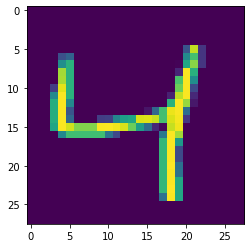

In [3]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[1])
plt.show()
plt.imshow(x_train[2])

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

In [7]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[1],1)
print("x_train: ",x_train.shape)
print("x_test : ",x_test.shape)

x_train:  (60000, 28, 28, 1)
x_test :  (10000, 28, 28, 1)


## Creating and Training the Model

In [8]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(x_train.shape[1:]),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience = 2,restore_best_weights=True)
model.fit(x=x_train,y=y_cat_train,batch_size=32,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1515 - accuracy: 0.9538 - val_loss: 0.0620 - val_accuracy: 0.9797
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0510 - accuracy: 0.9837 - val_loss: 0.0446 - val_accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0450 - val_accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0401 - val_accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0409 - val_accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0498 - val_accuracy: 0.9856


## Model Evaluation

In [10]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.151479,0.953850,0.062036,0.9797
1,0.051039,0.983700,0.044573,0.9852
2,0.032828,0.989600,0.044950,0.9853
3,0.021534,0.993217,0.040136,0.9876
4,0.014349,0.995550,0.040857,0.9868
5,0.010424,0.996617,0.049829,0.9856


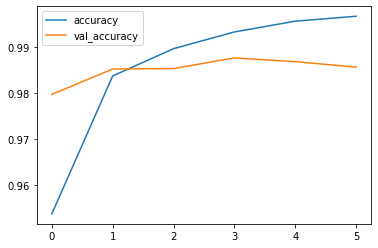

In [11]:
metrics[['accuracy','val_accuracy']].plot()

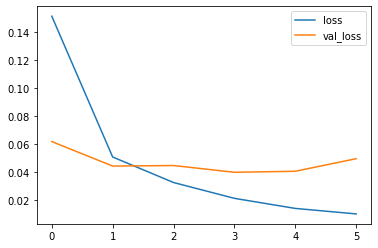

In [12]:
metrics[['loss','val_loss']].plot()

In [13]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.0401359498500824, 0.9876000285148621]

In [14]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg    

## Testing the Model

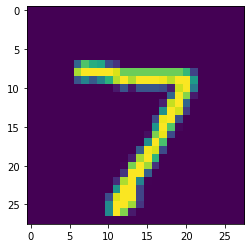

In [15]:
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28))

In [16]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)